In [1]:
import pickle

import tensorflow as tf
from tensorflow import keras

from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

#tensorflow and keras
#from keras.layers import Input

C:\Users\afiqAUT\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\afiqAUT\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\afiqAUT\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\afiqAUT\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarnin

In [2]:
import matplotlib.pyplot as plt
import sys
import numpy as np

MNIST containts 60000 instances. Here are the first 3


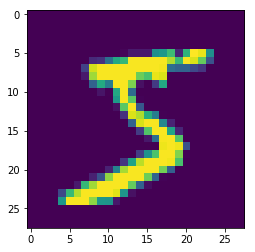

In [3]:
#test with mnist first
#fuck around with mnist
from keras.datasets import mnist
(X_train, _), (_, _) = mnist.load_data()
print("MNIST containts " + str(len(X_train)) + " instances. Here are the first 3")

plt.imshow(X_train[0])

In [4]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
"""
class GAN(): #we're doing class now
             #You made made a class in Processing befor you did in Python.
    def __init__(self):
        self.rfi_img_rows = 50
        self.rfi_img_cols = 1024
        self.rfi_channels = 1
        
        self.mnist_img_rows = 28
        self.mnist_img_cols = 28
        self.mnist_channels = 1
        
        self.img_shape = (self.mnist_img_rows, self.mnist_img_cols, self.mnist_channels) #got depth
        self.latent_dim = 100 #dimensions? subintegration style>=>
        
        optimizier = Adam(0.0002, 0.5)
        
        #initialize class
        #image shape channels and dimensions
        #adam is optimizaer function        
        
        sef.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=optimizer,
                                   metrics=['accuracy'])
        
        #Build Discriminator
        #set its loss function
        #type of optimizer we want to measure against
        
        self.generator = self.build_generator()
        z = Input(shape(self.latent_dim,))
        img = self.generator(z)
        
        #builds the and defines its input noise
        #The generator scrambles the noise to produce image
        
        self.discriminaotr.trainable = False
        
        #We only train the generator?
        
        validity = self.disciminator(img)
        
        #specifies that our Discriminator will take generator 
        #and true dataset and set its output to a parmeter called validity
        #indicate whether the input is real or not
        
        self.combine = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)
        
"""
#combine the models and set our loss function

"\nclass GAN(): #we're doing class now\n             #You made made a class in Processing befor you did in Python.\n    def __init__(self):\n        self.rfi_img_rows = 50\n        self.rfi_img_cols = 1024\n        self.rfi_channels = 1\n        \n        self.mnist_img_rows = 28\n        self.mnist_img_cols = 28\n        self.mnist_channels = 1\n        \n        self.img_shape = (self.mnist_img_rows, self.mnist_img_cols, self.mnist_channels) #got depth\n        self.latent_dim = 100 #dimensions? subintegration style>=>\n        \n        optimizier = Adam(0.0002, 0.5)\n        \n        #initialize class\n        #image shape channels and dimensions\n        #adam is optimizaer function        \n        \n        sef.discriminator = self.build_discriminator()\n        self.discriminator.compile(loss='binary_crossentropy',\n                                   optimizer=optimizer,\n                                   metrics=['accuracy'])\n        \n        #Build Discriminator\n        

In [18]:
class GAN():
    def build_generator(self):
        model = Sequential()
        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))
        model.summary()
        noise = Input(shape=(self.latent_dim,))
        img = model(noise)
        return Model(noise, img) 
   
    def build_discriminator(self):
        model = Sequential()
        model.add(Flatten(input_shape=self.img_shape))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        img = Input(shape=self.img_shape)
        validity = model(img)
        return Model(img, validity)
    
    def train(self, epochs, batch_size=128, sample_interval=50):
        (X_train, _), (_, _) = mnist.load_data()
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        
        for epoch in range(epochs):
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            g_loss = self.combined.train_on_batch(noise, valid)        
            
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
            if epoch % sample_interval == 0:
                #sampIMG()
                sample_images(self,epoch)
               
    #def sampIMG():
    #    print("sample!")
    
    #TODO fix this
    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)
        gen_imgs = 0.5 * gen_imgs + 0.5
        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
    
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100
        optimizer = Adam(0.0002, 0.5)
        self.discriminator = self.build_discriminator() 
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])
        self.generator = self.build_generator()

        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        self.discriminator.trainable = False

        validity = self.discriminator(img)

        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

In [19]:
if __name__ == '__main__':
    gan = GAN()
    gan.train(epochs=100000, batch_size=132, sample_interval=10000)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_______________________________________________

NameError: name 'sample_images' is not defined

In [8]:
#now with 
with open('label_weight.pickle', 'rb') as fid:
    a = pickle.load(fid, encoding='latin1')
    print("File openned and loaded")
    
print("Number of Weifgt Matrices: " + str(len(a)))

File openned and loaded
Number of Weifgt Matrices: 41


In [9]:
print("n_subint      n_channel")
for k, v in a.items():
    print(str(len(v)) + "      \t" + str(len(v[0])))

n_subint      n_channel
33      	928
26      	928
33      	928
44      	928
26      	928
26      	928
63      	1024
64      	928
26      	928
26      	928
26      	928
127      	1024
25      	928
34      	928
65      	928
27      	928
33      	928
25      	928
63      	928
130      	928
26      	928
26      	928
64      	928
127      	1024
97      	928
33      	928
34      	928
33      	928
34      	928
162      	928
26      	928
63      	1024
34      	928
26      	928
65      	928
257      	928
26      	928
35      	928
64      	928
27      	928
33      	928


60000

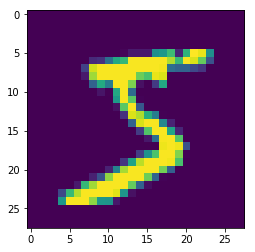

In [75]:
plt.imshow(X_train[0])

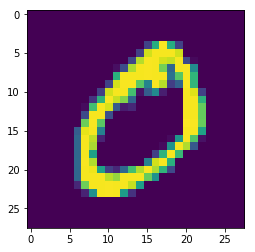

In [76]:
plt.imshow(X_train[1])

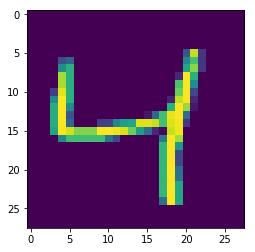

In [77]:
plt.imshow(X_train[2])

In [78]:
len(X_train[2])

28

In [79]:
len(X_train[2][0])

28